In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading our dataset
- Exploring more about our dataset

In [85]:
data = pd.read_csv('/Users/jay/Python Codes/fake bills/fake_bills.csv', delimiter = ';')
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


### Information about columns
- **is_genuine** : It's our target feature. 'True' when the bill is genuine and 'false' when the the bill is fake
- **diagonal** : Measurement of the bills diagnoally
- **height_left** : Height of the bill on left side
- **height_right** : Height of the bill on right side
- **margin_low** : Margin of the bill from bottom of the bill
- **margin_up** : Margin of the bill from the top of the bill
- **length** : Length of the bill

In [86]:
data.shape
# We can clearly see we have 1500 rows and 7 columns in our dataset

(1500, 7)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


- Here we can notice that 5th column has less data points than the other columns which indicates that our dataset have missing values in it so let's explore more about the missing data

In [88]:
data.describe() # statistical summary of our data

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [89]:
data.isnull().sum() # total missing values in each column

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

We notice here that we have 37 missing data points from **margin_low** column.

In [90]:
data['is_genuine'].value_counts()

is_genuine
True     1000
False     500
Name: count, dtype: int64

## Checking for Outliers in our dataset using Boxplot.
Using boxplot visualization to check the outliers in our dataset in each column.


<Axes: >

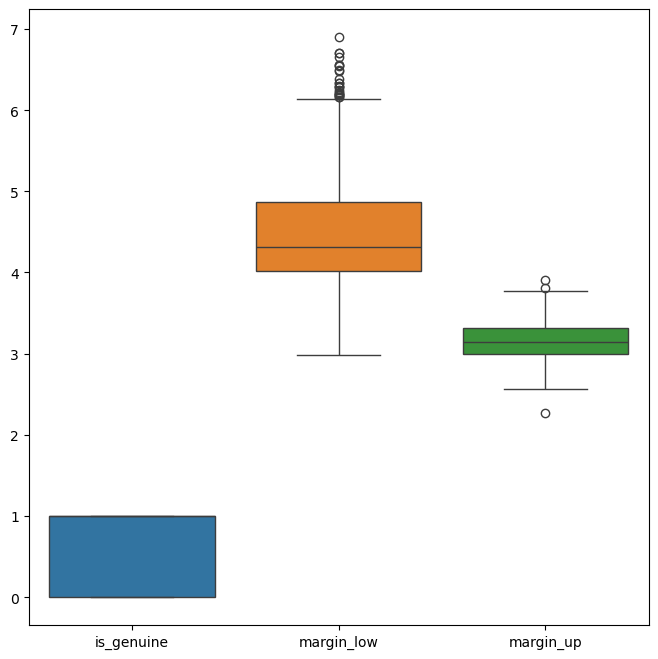

In [91]:
plt.figure(figsize = (8,8))
sns.boxplot(data = data[['is_genuine','margin_low','margin_up']])

<Axes: >

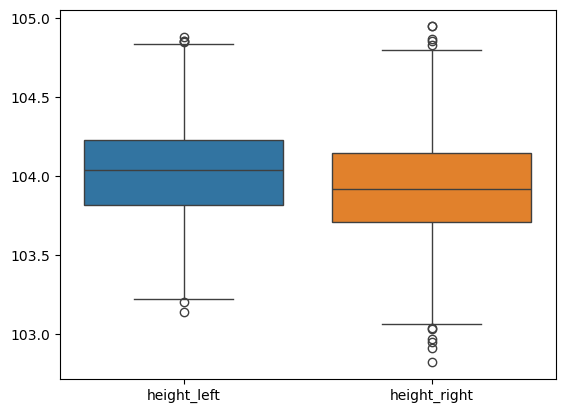

In [92]:
sns.boxplot(data[['height_left','height_right']])

Here we notice that our column has outliers, so we will deal with it but first we will check if it will affects our analysis.

### Plotting pairplot
using pairplot we are looking at the each column vs every other column

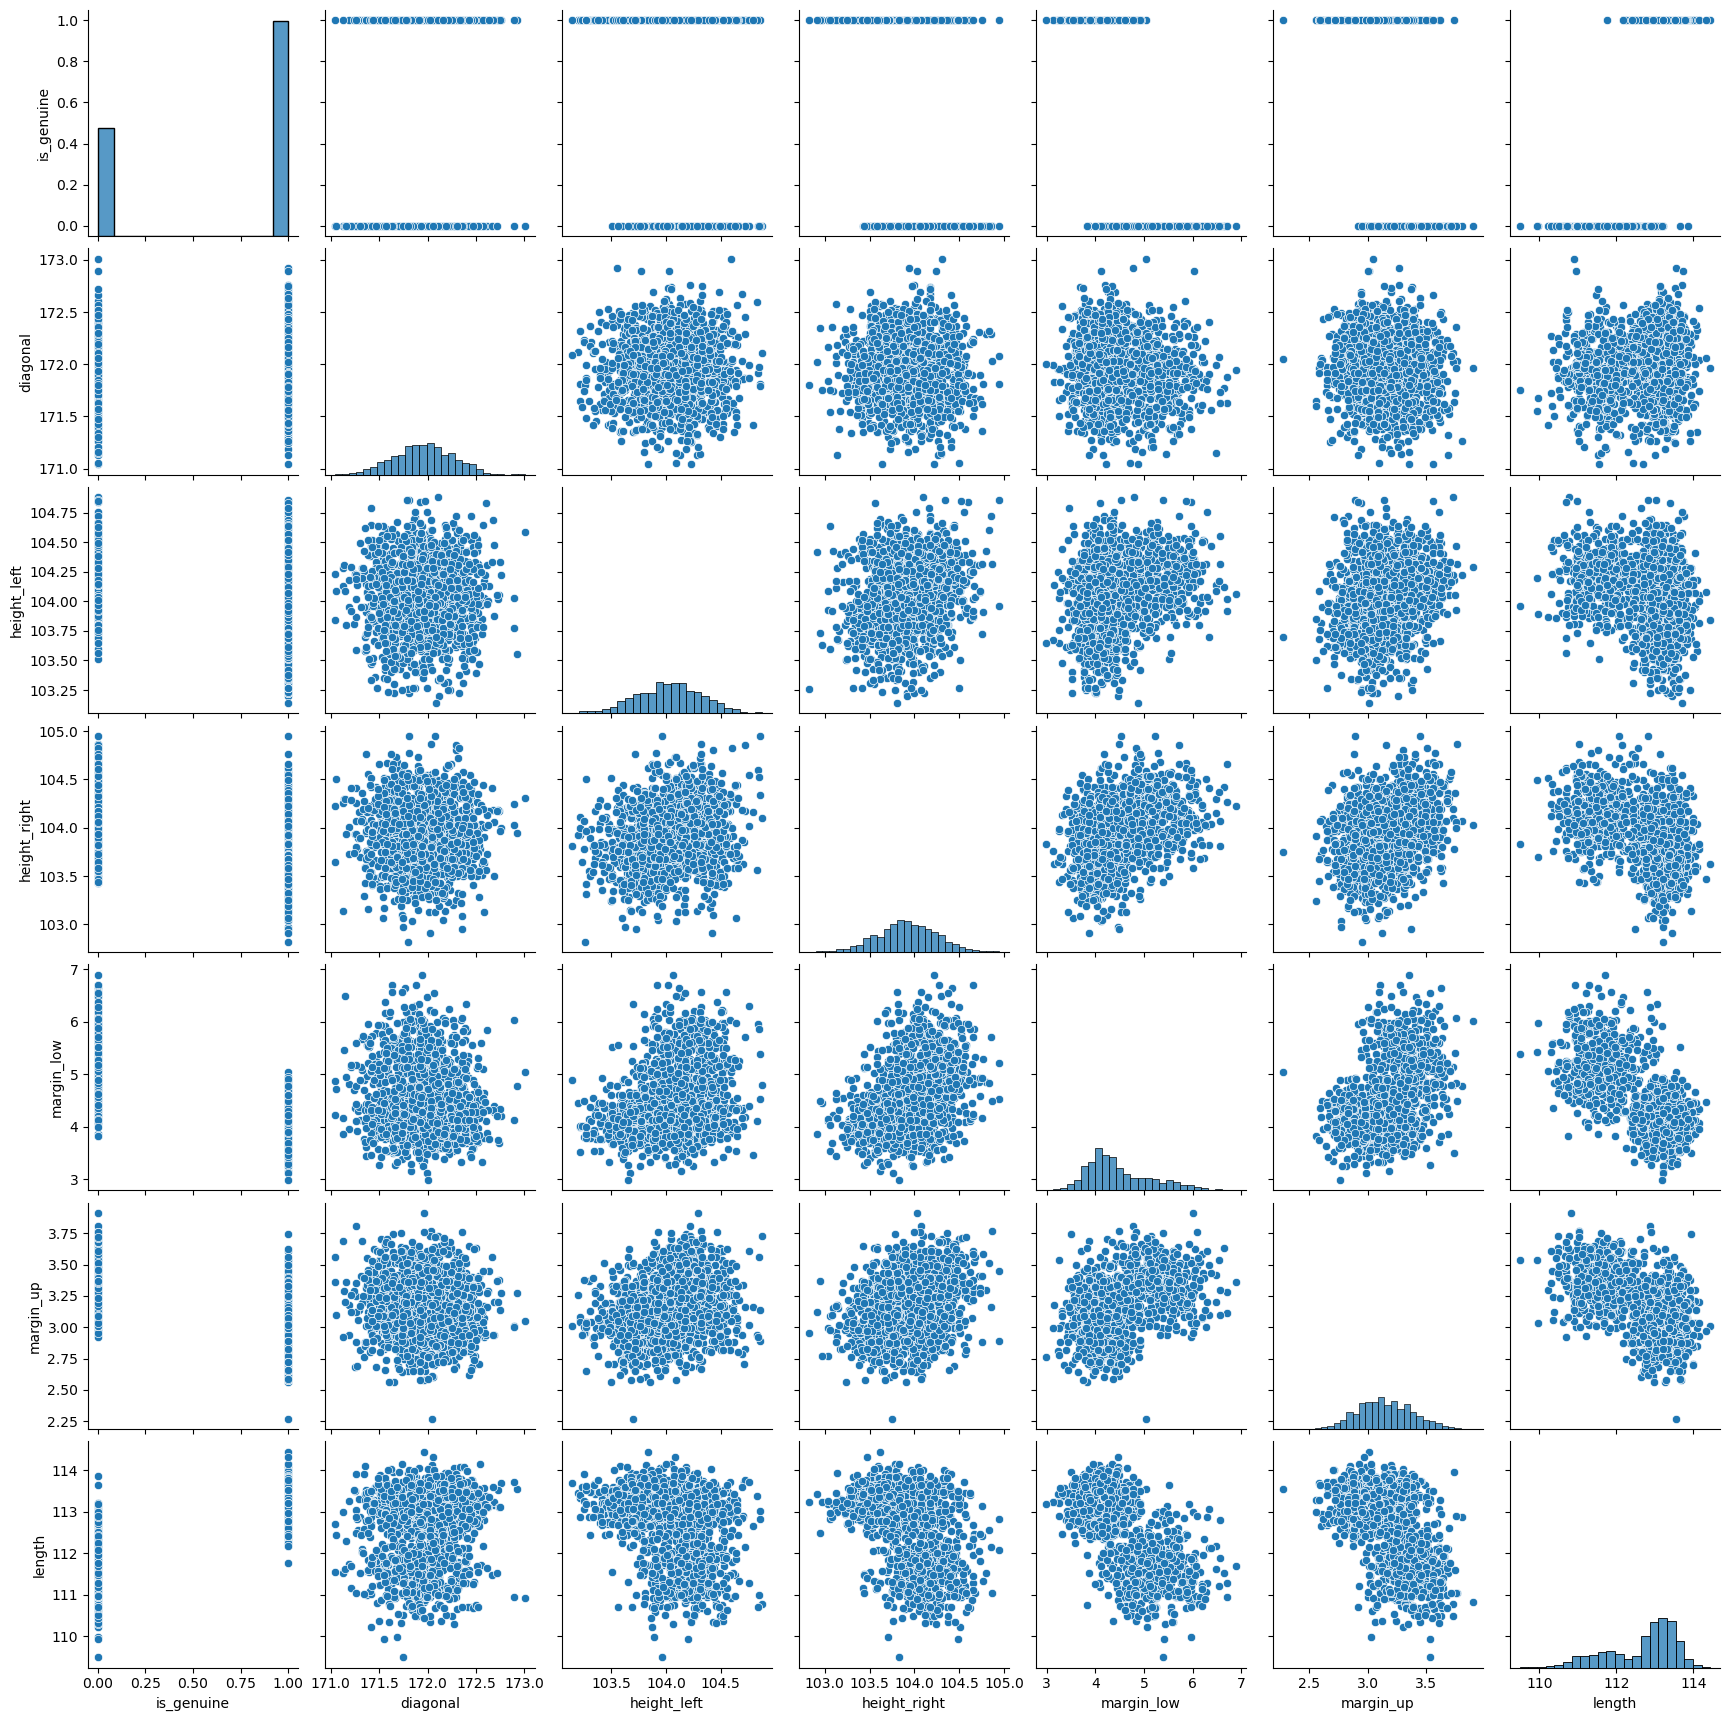

In [93]:
sns.pairplot(data=data)

### Dropping the null values that are present in our dataset

In [94]:
data.dropna(inplace=True)

## Finding Outliers Using IQR

In [95]:
col = ['diagonal', 'height_left', 'height_right', 'margin_low','margin_up', 'length']

In [96]:

def detect_outliers(data, cols, q1 , iqr, q3):
    outlier_indices = []
    for i, cols in enumerate(col):
        lower_bound = q1[i] - 1.5 * iqr[i]
        upper_bound = q3[i] + 1.5 * iqr[i]
        
        outliers = data[(data[cols] > upper_bound) | (data[cols] < lower_bound)]
        outlier_indices.extend(outliers.index)
        
    return list(set(outlier_indices))  # Return unique indices


cols_to_check = col
q1_values = [data[cols].quantile(0.25) for cols in cols_to_check]  # Q1 values
q3_values = [data[cols].quantile(0.75) for cols in cols_to_check] # Q3 values
iqr_values = [data[cols].quantile(0.75) - data[cols].quantile(0.25) for cols in cols_to_check]  # IQR values

outlier_indices = detect_outliers(data, cols_to_check, q1_values, iqr_values, q3_values)
print("Outlier indices:", outlier_indices)
print("Outliers:")
print(data.loc[outlier_indices])


Outlier indices: [0, 1027, 1029, 1031, 522, 1290, 1420, 1041, 1169, 1426, 1022, 664, 1053, 1310, 1441, 292, 1321, 1322, 1453, 1199, 176, 1331, 1075, 1459, 1464, 1082, 828, 193, 1090, 1345, 1092, 1348, 1473, 1353, 842, 1355, 1484, 77, 1110, 729, 224, 1124, 1382, 1254, 1388, 1133, 1134, 1142, 1270, 761, 1277, 1150, 1023]
Outliers:
      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1027       False    171.63       104.02        104.66        6.70       3.28   
1029       False    171.96       104.29        104.03        6.01       3.91   
1031       False    172.40       104.00        103.82        6.33       3.10   
522         True    172.02       104.42        102.91        3.86       3.12   
1290       False    171.94       104.06        104.22        6.90       3.36   
1420       False    171.56       104.47        104.04        6.38       3.43   
1041       False    171.77   

In [97]:
dff = data.loc[outlier_indices] # storing the outliers data in a new daatframe
ind = dff[dff['is_genuine']==True].index 
data.drop(index = ind,inplace=True) # droppung the outlier values
data.shape

(1451, 7)

Here we dropped only those outliers which were actually genuine bills becuase they were the potential outliers which would have created bias in our model.

## KNN Model training

#### Importing the neccessary libararies

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [99]:
X = data[col]
y= data['is_genuine']

#### Splitting data

In [100]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

##### Exploring our splitted data

In [101]:
x_train.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
1333,172.10,104.30,104.21,4.07,3.41,111.27
1077,171.80,104.12,104.06,5.66,3.29,111.09
432,171.47,104.46,104.30,4.12,3.06,113.59
1210,172.29,104.43,104.80,4.86,3.30,111.53
89,171.94,103.49,103.82,4.24,3.19,113.05


#### Finding the best value of K

In [102]:
def model_train(x_train,y_train, x_test, y_test):

    for k in range(1,10):
        model1 = KNeighborsClassifier(n_neighbors=k) 

        model1.fit(x_train, y_train) # Fitting the model on training data

        y_pred = model1.predict(x_test) # predicting the results on test data
        # accuracy and classification report of our model
        accuracy_ = accuracy_score(y_test, y_pred) 
        class_report = classification_report(y_test, y_pred)
        print(f'For K = {k} the accuracy score is {accuracy_*100:.2f} %')

In [103]:
model_1 = model_train(x_train, y_train, x_test, y_test)
model_1

For K = 1 the accuracy score is 97.25 %
For K = 2 the accuracy score is 97.25 %
For K = 3 the accuracy score is 97.94 %
For K = 4 the accuracy score is 97.59 %
For K = 5 the accuracy score is 97.59 %
For K = 6 the accuracy score is 97.59 %
For K = 7 the accuracy score is 97.59 %
For K = 8 the accuracy score is 97.59 %
For K = 9 the accuracy score is 97.59 %


- Our data seems to show an accuracy of 0.98 at different values of K.

- From before we can take our K to be anything as it appears accuracy remains same after k=2, so let's take K=3.

In [104]:
model_knn = KNeighborsClassifier(n_neighbors=3) 
model_knn.fit(x_train, y_train) # model training
y_pred = model_knn.predict(x_test) # predicting the values with our model

In [105]:
 # checking for the accuracy and classification report of our model
accuracy_knn = accuracy_score(y_test, y_pred)

class_report = classification_report(y_test, y_pred) 
print(f'For K = 3 the accuracy score is {accuracy_knn*100:.2f} %')

For K = 3 the accuracy score is 97.94 %


In [106]:
# predicting the genuinity of a custom entry
custom_data = np.array([179,105,102,5.32, 5.20, 115.43]).reshape(1,-1)
custom_result = model_knn.predict(custom_data)
custom_result

/Users/jay/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Decision Tree Classifier

In [107]:
from sklearn.tree import DecisionTreeClassifier #importing

In [108]:
model_dt = DecisionTreeClassifier()

In [109]:
model_dt.fit(x_train, y_train) # training model on training set

DecisionTreeClassifier()

In [110]:
dt_predict = model_dt.predict(x_test) # prediciting the values on test data
accuracy_dt = accuracy_score(y_test, dt_predict) # accuracy of our model
print(f'The accuracy score for our DecsionTreeClassifier is {accuracy_dt*100:.2f} %')


The accuracy score for our DecsionTreeClassifier is 97.94 %


In [111]:
custom_r = model_dt.predict(custom_data)
custom_r

/Users/jay/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([False])

## Random Forest Claassifier

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
model_rf = RandomForestClassifier()

In [114]:
model_rf.fit(x_train, y_train) # modle training on training set
rf_predict = model_rf.predict(x_test)

In [115]:
accuracy_rf = accuracy_score(y_test, rf_predict ) # accuracy of our model
print(f'Accuracy of our our RandomForestClassifier model is {accuracy_rf*100:.2f} %') 

Accuracy of our our RandomForestClassifier model is 97.94 %


In [116]:
confusion_mat_rf = confusion_matrix(y_test, rf_predict) # checking the confusion matrix of our model
print(confusion_mat_rf)

[[ 76   6]
 [  0 209]]


In [117]:
custom_rf = model_rf.predict(custom_data) # checking our model on a custom data
custom_rf

/Users/jay/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([False])

## Logistic regression

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train) # model training
lr_predict = model_lr.predict(x_test)  # prediciting the results using test data
accuracy_lr = accuracy_score(y_test, lr_predict) # accuracy of our model using logistic regression
confusion_mat = confusion_matrix(y_test, lr_predict) # confusion matrix of our model
classification_lr = classification_report(y_test, lr_predict)

In [120]:
print(f'The accurcay score for our Logistic regression model is {accuracy_lr*100:.2f} %')

The accurcay score for our Logistic regression model is 97.94 %


In [121]:
print(f'The confusion matrix is \n {confusion_mat}')

The confusion matrix is 
 [[ 76   6]
 [  0 209]]


In [122]:
print(classification_lr)

              precision    recall  f1-score   support

       False       1.00      0.93      0.96        82
        True       0.97      1.00      0.99       209

    accuracy                           0.98       291
   macro avg       0.99      0.96      0.97       291
weighted avg       0.98      0.98      0.98       291



In [123]:
# checking our model on a custom data
custom_lr = model_lr.predict(custom_data)
custom_lr

/Users/jay/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

So from above we can clearly see that different model has different accuracy on our data but they are very close to each other with KNN having the best accuracy score.

**Accuracy** score of different models:
- KNN : 97.94%
- Decision Tree Classifier : 97.59%
- Random Forest classifier : 97.94%
- Logistic Regression : 97.94%